In [7]:
import pandas as pd
from collections import Counter
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import sys
import os
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage,leaves_list
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import hamming, squareform
from scipy.spatial.distance import pdist, jaccard

BLOOD_MICROBIOME_PATH = '/home/groups/dpwall/briannac/blood_microbiome/'
fig_dir=BLOOD_MICROBIOME_PATH + 'results/abundances/'

sys.path.append('/home/groups/dpwall/briannac/blood_microbiome/src')
bam_mappings_file = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'

bacteria_file = BLOOD_MICROBIOME_PATH + 'data/kraken_align/bacteria_filtered_species.df' 
virus_file = BLOOD_MICROBIOME_PATH + 'data/kraken_align/virus_filtered_species.df' 

In [ ]:
bam_mappings = pd.read_csv(bam_mappings_file, sep='\t')
bam_mappings.columns
#Counter(bam_mappings['number_of_library_preps'])

# Filter

## Load / format data

In [8]:
bam_mappings = pd.read_csv(bam_mappings_file, sep='\t', index_col=1)
df_bacteria = pd.read_pickle(bacteria_file)
df_virus  = pd.read_pickle(virus_file)

In [10]:
df_virus.i

MH0143019  \
tax_level tax_id  name                                                            
S         10288   Choristoneura biennis entomopoxvirus                       10   
          10366   Murid betaherpesvirus 1                                     1   
          10372   Human betaherpesvirus 7                                   111   
          10376   Human gammaherpesvirus 4                                    1   
          10847   Escherichia virus phiX174                                 131   
          11191   Murine respirovirus                                         9   
          11216   Human respirovirus 3                                        1   
          11786   Murine leukemia virus                                       0   
          11856   Squirrel monkey retrovirus                                  0   
          31537   Lactococcus virus c2                                        0   
          32603   Human betaherpesvirus 6A                                    0   
          32604   Human betaherpesvirus 6B                                    4   
          45455   Macacine gammaherpesvirus 4                                 0   
          72197   Human erythrovirus V9                                       0   
          83191   Melanoplus sanguinipes entomopoxvirus                       3   
          106332  Papiine gammaherpesvirus 1                                  0   
          129951  Human mastadenovirus C                                      0   
          251749  Phaeocystis globosa virus                                   0   
          307456  Autographa californica multiple nucleopolyhedro...          0   
          317858  Cyprinid herpesvirus 1                                      4   
          687346  Torque teno virus 7                                         0   
          687347  Torque teno virus 8                                         0   
          687352  Torque teno virus 13                                        0   
          687354  Torque teno virus 15                                        0   
          687359  Torque teno virus 20                                        0   
          687360  Torque teno virus 21                                        0   
          687363  Torque teno virus 24                                        0   
          1094892 Megavirus chiliensis                                        1   
          1511900 Primate erythroparvovirus 1                                 0   
          1511902 Primate erythroparvovirus 3                                 0   
          1678078 Mollivirus sibericum                                       15   
          1910968 Escherichia virus ID52                                     41   
          1910969 Escherichia virus Talmos                                   97   
          1945582 Escherichia virus WA45                                      4   
          1945584 Escherichia virus ID21                                     76   
          1945585 Escherichia virus NC28                                     36   
          1945586 Escherichia virus NC29                                     58   
          1945588 Escherichia virus ID62                                     14   
          1945589 Escherichia virus alpha3                                   16   
          1965376 Escherichia virus EC6                                       4   
          1983547 Sulfolobus islandicus rod-shaped virus 4                   19   
          1985284 Escherichia virus St1                                      25   
          1986034 Escherichia virus G4                                      210   
          1987479 Choristoneura murinana nucleopolyhedrovirus                 1   
          2023057 Orpheovirus IHUMI-LCC2                                      6   
          2072209 Esparto virus                                               2   
          2107707 Pandoravirus macleodensis                                   7   
   

# Microbe Abundance Plots
## Virus

In [12]:
virus_abundant = df_virus.columns[np.argsort(df_virus.sum())[::-1]][:50]
virus_prevalent = []#df_virus.columns[np.argsort((df_virus>0).sum())[::-1]][:25]
select_viruses = list(set(virus_abundant).union(set(virus_prevalent)))
len(select_viruses)

47

In [13]:
# Hacky way to make cylical color palette.
a=np.concatenate([[tuple(i) for i in sns.color_palette("husl", 34)[n::5]] for n in range(5)])
a = [tuple(i) for i in a]
palette = ['#%02x%02x%02x' % (int(i[0]*255), int(i[1]*255), int(i[2]*255)) for i in a]
hierarchy.set_link_color_palette(palette)

In [ ]:
dists = 1-df_virus[select_viruses].corr('spearman')#pdist(df_bacteria.transpose(), 'braycurtis')
linkage_mat = linkage(squareform(dists))#, 'ward')
virus_order = df_virus[select_viruses].columns[leaves_list(linkage_mat)]
plt.figure(figsize=(5,10))
dn2 = dendrogram(linkage_mat, orientation='left', labels=select_viruses, color_threshold=0.9*np.max(linkage_mat[:,2]), get_leaves=True, above_threshold_color='#858585')
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=10)
plt.box(on=None)
plt.bbox_inches='tight'
plt.xticks([])
plt.tight_layout()
plt.savefig(fig_dir + 'virus_clusters.png', transparent=True, bbox_inches='tight', format='png', dpi=500)
plt.show()

In [30]:
### Hacky way to get colors right ###
# Viruses that don't belong to a cluster (bottom to top)
#for v in virus_order[::-1]: print("'%s',"%v)
loners = [
'Gryllus bimaculatus nudivirus',
'Human herpesvirus 1',
'Rhodococcus phage Whack',
'Burkholderia phage Bcep22',
'Alcelaphine herpesvirus 1',
'Ovine herpesvirus 2',
'Human parainfluenza virus',
'Moloney murine leukemia',
'Squirrel monkey retrovirus',
'Enterobacteria phage T4',]

palette_dict = {p:i for i,p in enumerate(['#858585'] + palette)}
color_count = Counter([palette_dict[d] for d in dn2['color_list']])
color = np.array([0 for i in virus_order])
i_start = 0
for c in range(1,len(color_count)):
    while virus_order[i_start] in loners:
        i_start = i_start + 1
    i_end = i_start + color_count[c] + 1
    color[i_start:i_end] = c
    i_start = i_end
color_dict = {i:j for i,j in zip(virus_order, color)}

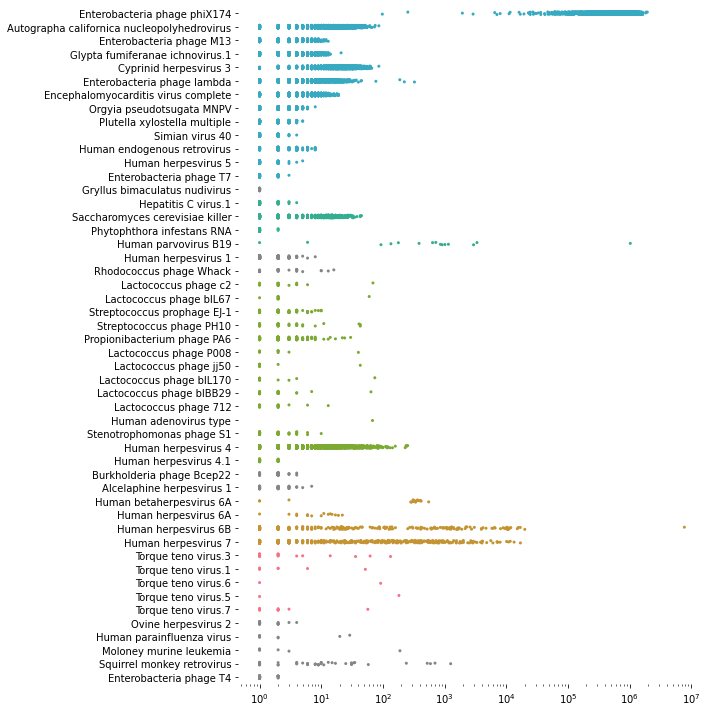

In [31]:
sns.set_palette(['#858585'] + palette)
plt.figure(figsize=(10,10))
df_melt = pd.melt(df_virus[virus_order[::-1]])
df_melt = df_melt[df_melt.value>0]
df_melt = df_melt[df_melt.value>0]
df_melt['color'] = [color_dict[v] for v in df_melt.variable]
sns.stripplot(data=df_melt, y='variable', x='value', hue='color', jitter=.1, size=3)
plt.xscale('log')
plt.ylabel('')
plt.xlabel('')
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=10)
plt.box(on=None)
plt.legend().remove()
plt.tight_layout()
plt.savefig(fig_dir + 'virus_abundance.png', transparent=True, bbox_inches='tight', format='png', dpi=500)

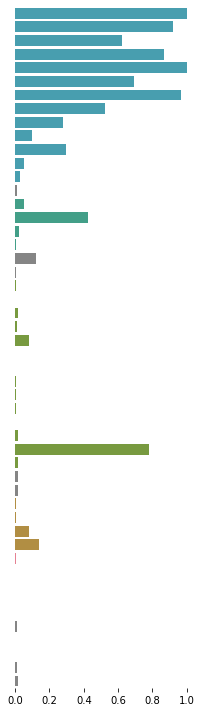

In [32]:
plt.figure(figsize=(3,10))
prevalence = pd.DataFrame((df_virus>0).mean(),columns=['prev'])
prevalence = prevalence.loc[virus_order[::-1]]
prevalence['microbe'] = prevalence.index
prevalence['color'] = [color_dict[v] for v in prevalence.microbe]
sns.barplot(data=prevalence, y='microbe', x='prev', hue='color', dodge=False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.legend().remove()
plt.box(on=None)
plt.tight_layout()
plt.savefig(fig_dir + 'virus_prevalence.png', transparent=True, bbox_inches='tight', format='png', dpi=500)

# Bacteria

In [9]:
bacteria_abundant = df_bacteria.columns[np.argsort(df_bacteria.sum())[::-1]][:100]
bacteria_prevalent = []#df_bacteria.columns[np.argsort((df_bacteria>0).sum())[::-1]][:100]
select_bacteria = list(set(bacteria_abundant).union(set(bacteria_prevalent)))
len(select_bacteria)

100

In [10]:
dists = 1-df_bacteria[select_bacteria].corr('spearman')#pdist(df_bacteria.transpose(), 'braycurtis')
linkage_mat = linkage(dists)
bacteria_order = list(df_bacteria[select_bacteria].columns[leaves_list(linkage_mat)])

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


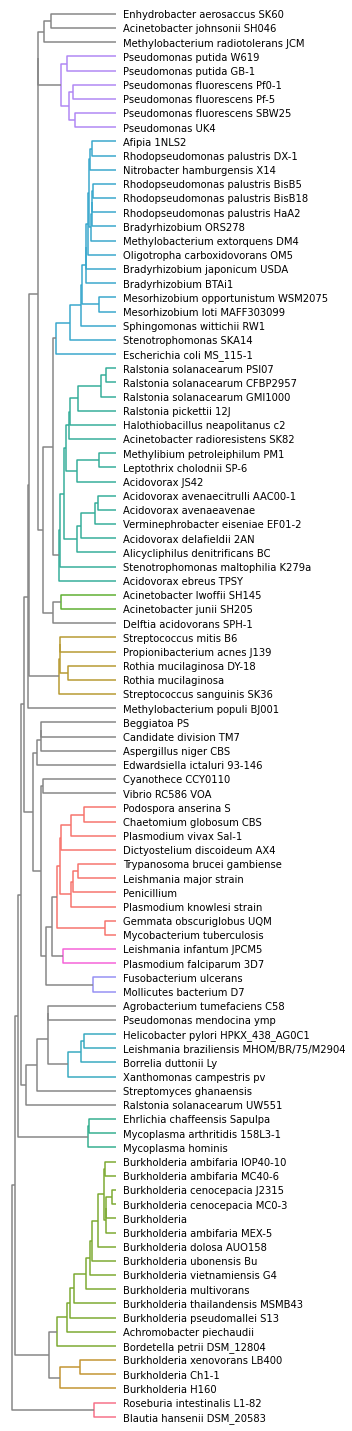

In [11]:
plt.figure(figsize=(5,20))
hierarchy.set_link_color_palette(palette)
dn2 = dendrogram(linkage_mat, orientation='left', labels=select_bacteria,color_threshold=0.6*np.max(linkage_mat[:,2]), above_threshold_color='#858585')
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=10)
plt.box(on=None)
plt.bbox_inches='tight'
plt.xticks([])
plt.tight_layout()
plt.savefig(fig_dir + 'bacteria_clusters.png', transparent=True, bbox_inches='tight', format='png', dpi=500)
plt.show()

In [12]:
### Hacky way to get colors right ###
#for v in bacteria_order[::-1]: print("'%s',"%v)
# Bacteria that don't belong to a cluster (bottom to top)
loners = [
'Delftia acidovorans SPH-1',
'Enhydrobacter aerosaccus SK60',
'Acinetobacter johnsonii SH046',
'Methylobacterium radiotolerans JCM',
'Methylobacterium populi BJ001',
'Beggiatoa PS',
'Candidate division TM7',
'Aspergillus niger CBS',
'Edwardsiella ictaluri 93-146',
'Cyanothece CCY0110',
'Vibrio RC586 VOA',
'Pseudomonas mendocina ymp',
'Agrobacterium tumefaciens C58',
'Streptomyces ghanaensis',
'Ralstonia solanacearum UW551',
]

palette_dict = {p:i for i,p in enumerate(['#858585'] + palette)}
color_count = Counter([palette_dict[d] for d in dn2['color_list']])
color = np.array([0 for i in bacteria_order])
i_start = 0
for c in range(1,len(color_count)):
    while bacteria_order[i_start] in loners:
        i_start = i_start + 1
    i_end = i_start + color_count[c] + 1
    color[i_start:i_end] = c
    i_start = i_end
color_dict = {i:j for i,j in zip(bacteria_order, color)}

In [13]:
sns.set_palette(['#858585'] + palette)
df_melt = pd.melt(df_bacteria[bacteria_order[::-1]])
df_melt = df_melt[df_melt.value>0]
df_melt['color'] = [color_dict[v] for v in df_melt.variable]

In [14]:
df_bacteria['Mycobacterium tuberculosis'].max()

18222

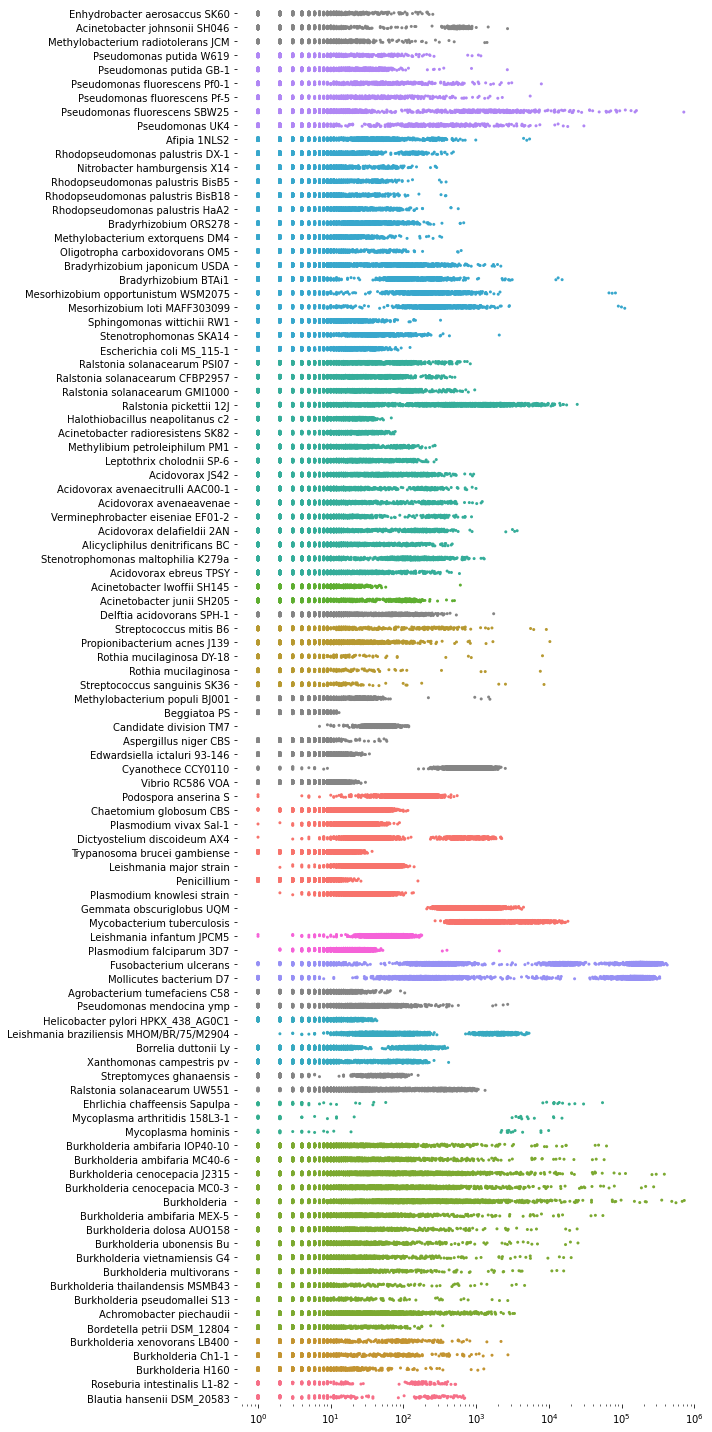

In [15]:
plt.figure(figsize=(10,20))
df_melt = pd.melt(df_bacteria[bacteria_order[::-1]])
df_melt = df_melt[df_melt.value>0]
df_melt = df_melt[df_melt.value>0]
df_melt['color'] = [color_dict[v] for v in df_melt.variable]
sns.stripplot(data=df_melt, y='variable', x='value', hue='color', jitter=.1, size=3)
plt.xscale('log')
plt.ylabel('')
plt.xlabel('')
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=10)
plt.box(on=None)
plt.legend().remove()
plt.tight_layout()
plt.savefig(fig_dir + 'bacteria_abundance.png', transparent=True, bbox_inches='tight', format='png', dpi=500)

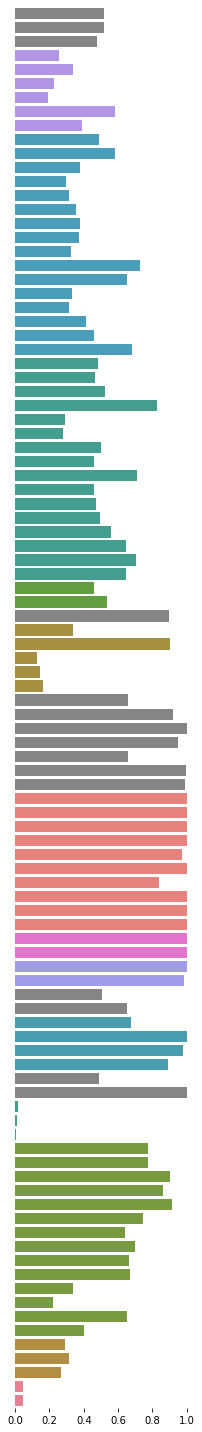

In [16]:
sns.set_palette(['#858585'] + palette)
plt.figure(figsize=(3,20))
prevalence = pd.DataFrame((df_bacteria>0).mean(),columns=['prev'])
prevalence = prevalence.loc[bacteria_order[::-1]]
prevalence['microbe'] = prevalence.index
prevalence['color'] = [color_dict[v] for v in prevalence.microbe]
sns.barplot(data=prevalence, y='microbe', x='prev', hue='color', dodge=False)
#plt.xscale('log')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.legend().remove()
plt.box(on=None)
plt.tight_layout()
plt.savefig(fig_dir + 'bacteria_prevalence.png', transparent=True, bbox_inches='tight', format='png', dpi=500)

## (SCRATCH) pca

/home/users/briannac/.local/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
No handles with labels found to put in legend.


[0.16233846 0.06948123 0.06627562 0.04914207 0.03845041]


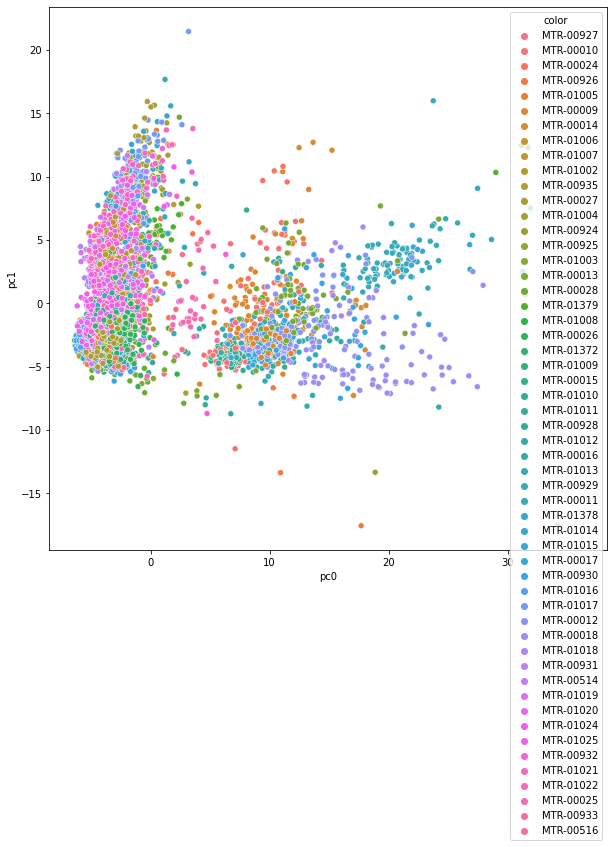

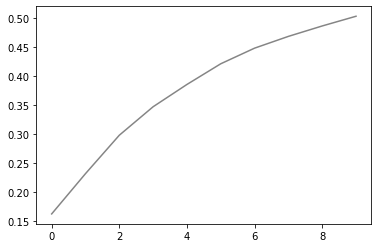

In [17]:
from sklearn.preprocessing import StandardScaler
from skbio.stats.ordination import pcoa
from sklearn.decomposition import PCA
s = StandardScaler()
transformed_data = np.log10(df_bacteria+1)
transformed_data = s.fit(transformed_data).transform(transformed_data)#.apply(np.argsort, axis=1)#s.fit(df_bacteria).transform(df_bacteria)
plt.figure(figsize=(10,10))
pca = PCA(n_components=10)
pca.fit(transformed_data)
transform = pd.DataFrame(pca.transform(transformed_data))
transform.columns = ['pc%i' % i for i in transform.columns]
transform['color'] = [str(bam_mappings.loc[i.split(' ')[0]].sequencing_plate) for i in df_bacteria.index]
sns.scatterplot(data=transform, x='pc0', y='pc1', hue='color')
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_[:5])
plt.legend().remove()

In [18]:
print(df_bacteria.columns[np.argsort(abs(pca.components_[0]))[::-1]][:20])
print(np.sort(abs(pca.components_[0]))[::-1][:20])

Index(['Mesorhizobium loti MAFF303099', 'Mesorhizobium opportunistum WSM2075',
       'Afipia 1NLS2', 'Bradyrhizobium BTAi1', 'Bradyrhizobium ORS278',
       'Rhodopseudomonas palustris HaA2', 'Methylobacterium extorquens DM4',
       'Rhodopseudomonas palustris BisB18', 'Rhodopseudomonas palustris BisB5',
       'Rhodopseudomonas palustris BisA53', 'Sphingomonas wittichii RW1',
       'Stenotrophomonas maltophilia K279a',
       'Rhodopseudomonas palustris TIE-1', 'Nitrobacter hamburgensis X14',
       'Oligotropha carboxidovorans OM5', 'Rhodopseudomonas palustris DX-1',
       'Bradyrhizobium japonicum USDA', 'Stenotrophomonas SKA14',
       'Escherichia coli MS_115-1', 'Escherichia coli K-12MG1655'],
      dtype='object')
[0.13198159 0.1319151  0.12831576 0.12806377 0.12787183 0.12631983
 0.12477273 0.1239782  0.12371321 0.12302988 0.1229215  0.12207532
 0.12052918 0.12044776 0.11984855 0.1197716  0.11973182 0.11897604
 0.1159065  0.1142557 ]


<AxesSubplot:xlabel='pc0', ylabel='pc1'>

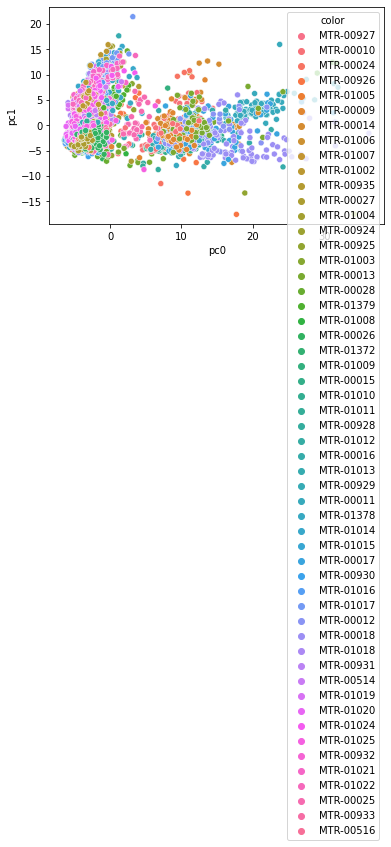

In [19]:
sns.scatterplot(data=transform, x='pc0', y='pc1', hue='color')

In [20]:
s.fit(df_bacteria).transform(df_bacteria)

array([[-0.23004904, -0.3808388 , -0.2204728 , ...,  0.76885136,
         0.05960841, -0.12907392],
       [-0.22394071,  1.36132395, -0.2204728 , ..., -0.25369707,
        -0.34806011,  1.13279804],
       [-0.23004904, -0.41340258, -0.2204728 , ...,  0.42800188,
        -0.22262364,  1.76373401],
       ...,
       [-0.17507411, -0.44596637, -0.2204728 , ..., -0.25369707,
         3.07008365,  3.65654195],
       [-0.14453249, -0.47853016, -0.2204728 , ..., -0.25369707,
         1.59620515,  1.76373401],
       [-0.12620751, -0.44596637, -0.2204728 , ...,  0.25757714,
         3.07008365,  2.39466999]])